**Dataset Overview**

• Date: The specific day the data was recorded.  
• App: The name of the application used (e.g., Instagram, WhatsApp).  
• Usage (minutes): The total minutes spent on the app during the recorded day.  
• Notifications: The number of notifications received from the app on that day.  
• Times Opened: The number of times the app was opened on the recorded day.

**Problem Statement**

The project aims to analyze user screen time patterns to understand how notification settings and user engagement behaviors affect overall app usage. Specifically, this study will quantify the impact of turning off notifications for certain apps on reducing screen time, providing users with insights into minimizing unnecessary app usage. By examining daily screen time trends, interaction frequency, and the influence of notifications, the objective is to offer actionable recommendations for healthier device habits and effective screen time management.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("screentime_analysis.csv")

In [5]:
data.head(5)

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [6]:
data.describe

<bound method NDFrame.describe of            Date        App  Usage (minutes)  Notifications  Times Opened
0    2024-08-07  Instagram               81             24            57
1    2024-08-08  Instagram               90             30            53
2    2024-08-26  Instagram              112             33            17
3    2024-08-22  Instagram               82             11            38
4    2024-08-12  Instagram               59             47            16
..          ...        ...              ...            ...           ...
195  2024-08-10   LinkedIn               22             12             5
196  2024-08-23   LinkedIn                5              7             1
197  2024-08-18   LinkedIn               19              2             5
198  2024-08-26   LinkedIn               21             14             1
199  2024-08-02   LinkedIn               13              4             1

[200 rows x 5 columns]>

In [7]:
print(data.dtypes)

Date               object
App                object
Usage (minutes)     int64
Notifications       int64
Times Opened        int64
dtype: object


In [8]:
data['Date']=pd.to_datetime(data['Date'])

In [9]:
print(data.dtypes)

Date               datetime64[ns]
App                        object
Usage (minutes)             int64
Notifications               int64
Times Opened                int64
dtype: object


**Analyzing Screen Time Trends Across All Apps Over Time**

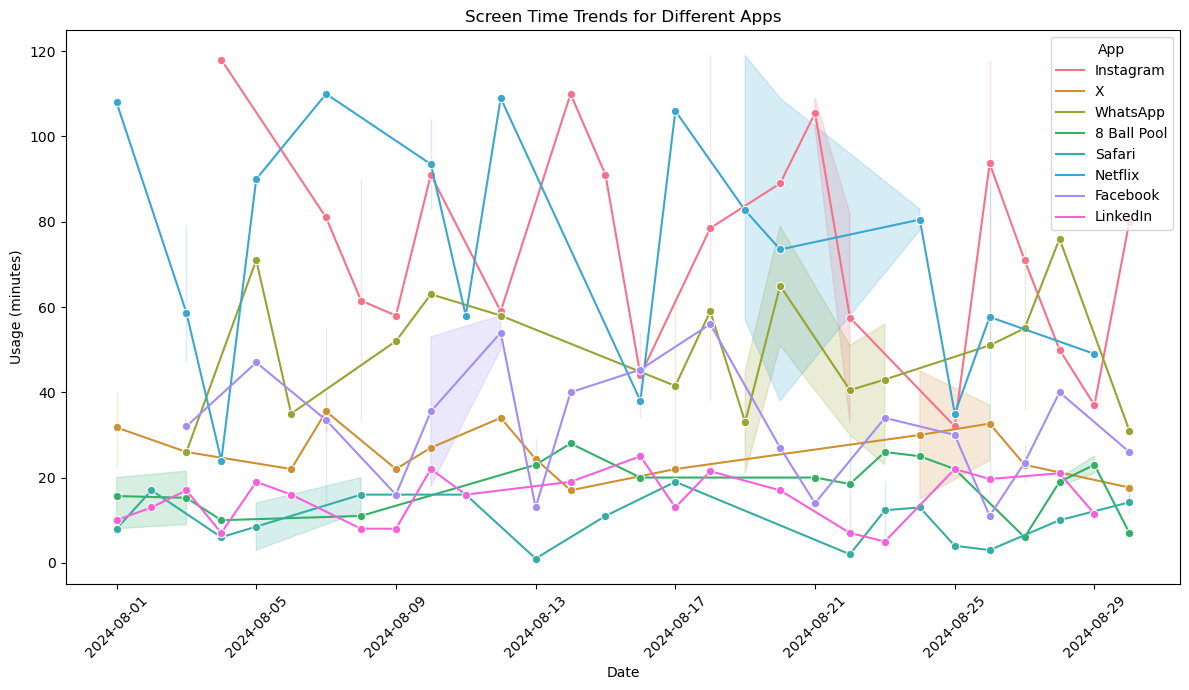

In [34]:
import warnings

# Ignore specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(12, 7))
sns.lineplot(x='Date', y='Usage (minutes)', hue='App', data=data, marker="o")
plt.title('Screen Time Trends for Different Apps')
plt.ylabel('Usage (minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above graph displays screen time usage across various apps during August 2024. Instagram shows the most fluctuation and highest usage, with peaks around mid-August and on August 26. Apps like X, WhatsApp, and Netflix have lower, more stable usage patterns. Safari and 8 Ball Pool exhibit notable variability, with 8 Ball Pool reaching its peak around August 11. LinkedIn and Facebook remain relatively low and steady in usage throughout the month. Overall, Instagram leads in screen time, while other apps have occasional spikes but lower overall engagement.

**Examining the Relationship Between Screen Time, Notifications, and App Opens**

<Figure size 1000x500 with 0 Axes>

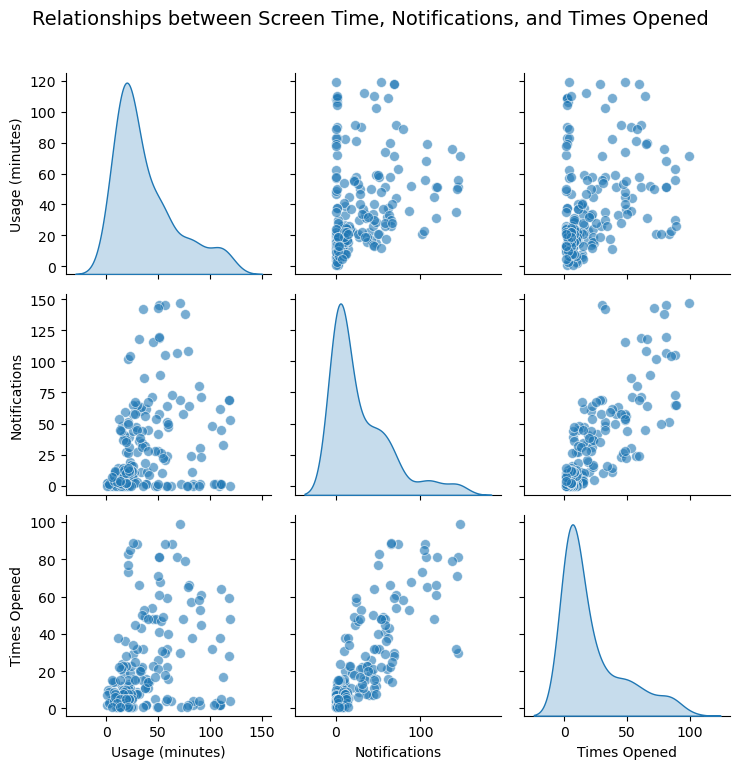

In [11]:
plt.figure(figsize=(10, 5))

pairplot = sns.pairplot(
    data[['Usage (minutes)', 'Notifications', 'Times Opened']], 
    kind="scatter", 
    diag_kind="kde",  
    plot_kws={'alpha':0.6, 's':50}  
)

pairplot.fig.suptitle('Relationships between Screen Time, Notifications, and Times Opened', y=1.02, fontsize=14)

plt.tight_layout()

plt.show()

The pair plot above illustrates relationships between screen time (in minutes), notifications, and the number of times an app was opened. The scatter plots reveal a moderate positive correlation between notifications and app openings, as well as between app openings and usage minutes, suggesting that more notifications lead to increased app usage and more frequent openings. However, the correlation between screen time and notifications is weaker, indicating that a high number of notifications doesn’t necessarily equate to more screen time. The diagonal histograms also show that most data points are concentrated at low values for usage, notifications, and times opened.

**Analyzing Top Apps by Screen Time: Average Usage, Notifications, and App Openings**

In [12]:
app_analysis = data.groupby('App').agg(
    avg_usage=('Usage (minutes)', 'mean'),
    avg_notifications=('Notifications', 'mean'),
    avg_times_opened=('Times Opened', 'mean')
).reset_index()

app_analysis = app_analysis.sort_values(by='avg_usage', ascending=False)

app_analysis

,App,avg_usage,avg_notifications,avg_times_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


**Key Insights:**

•	Instagram: This app tops the list in both screen time and notifications, with users spending an average of 76 minutes per day, receiving 49 notifications, and opening the app approximately 41 times. This high engagement suggests frequent and interactive usage.
•	WhatsApp: Ranking second in app openings (68 times on average) and receiving a high volume of notifications (around 100 daily), WhatsApp’s screen time is lower than Instagram and Netflix. This pattern reflects WhatsApp’s frequent but brief interaction style.
•	Netflix: Users average 72 minutes per day on Netflix, but with very low interaction frequency—just 2.5 app openings and almost no notifications. This aligns with Netflix’s nature of long, uninterrupted viewing sessions, such as watching shows or movies.
•	Other Apps: Facebook, LinkedIn, and Safari show lower usage and interaction rates, indicating they are accessed less frequently and for shorter durations, suggesting more occasional or specific-purpose use.

These insights provide a clear picture of distinct user behavior patterns across different types of apps.

**Analyzing Average User Screen Time by Day of the Week**

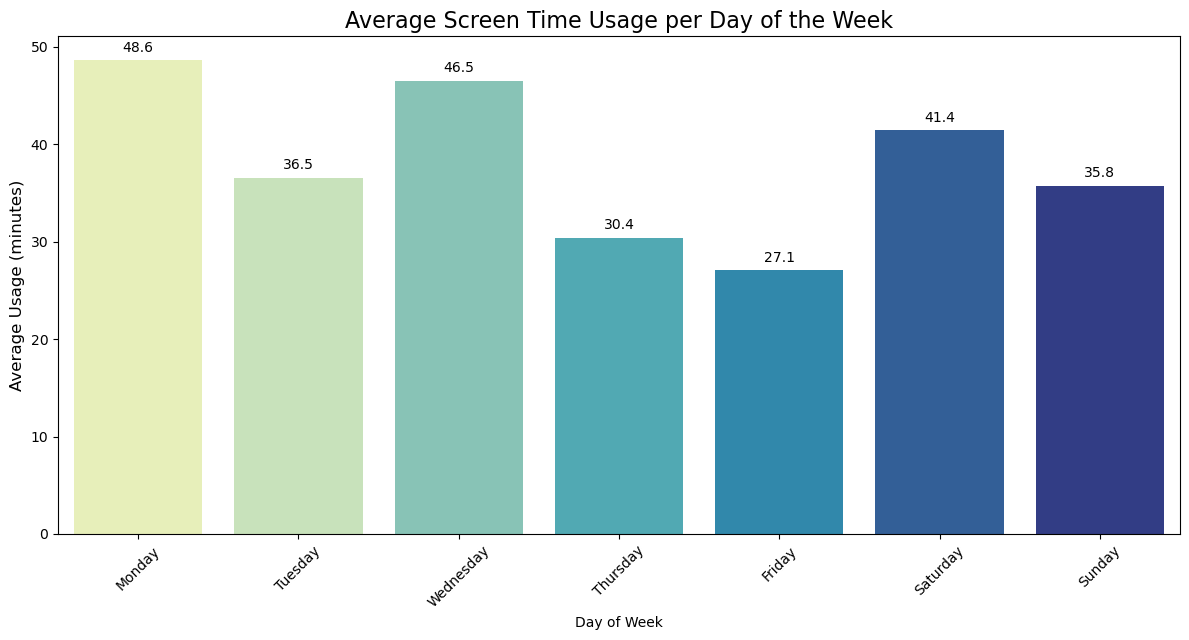

In [37]:
data['Day of Week'] = data['Date'].dt.day_name()

weekly_usage = data.groupby('Day of Week')['Usage (minutes)'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

colors = ["#0077b6", "#00b4d8", "#90e0ef"]

plt.figure(figsize=(12, 6.5))
ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values,palette="YlGnBu")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Screen Time Usage per Day of the Week', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Screen time peaks on Monday (48.6 minutes) and Wednesday (46.5 minutes), indicating that usage is highest at the beginning and middle of the week. Towards the end of the week, screen time declines, with Friday showing the lowest average (27.1 minutes). Screen time rises again on Saturday (41.4 minutes) and slightly decreases on Sunday (35.8 minutes). This pattern suggests greater engagement during workdays, with moderate usage over the weekend.

**Analyzing Daily Usage Patterns for Top Apps: Instagram, Netflix, and WhatsApp**

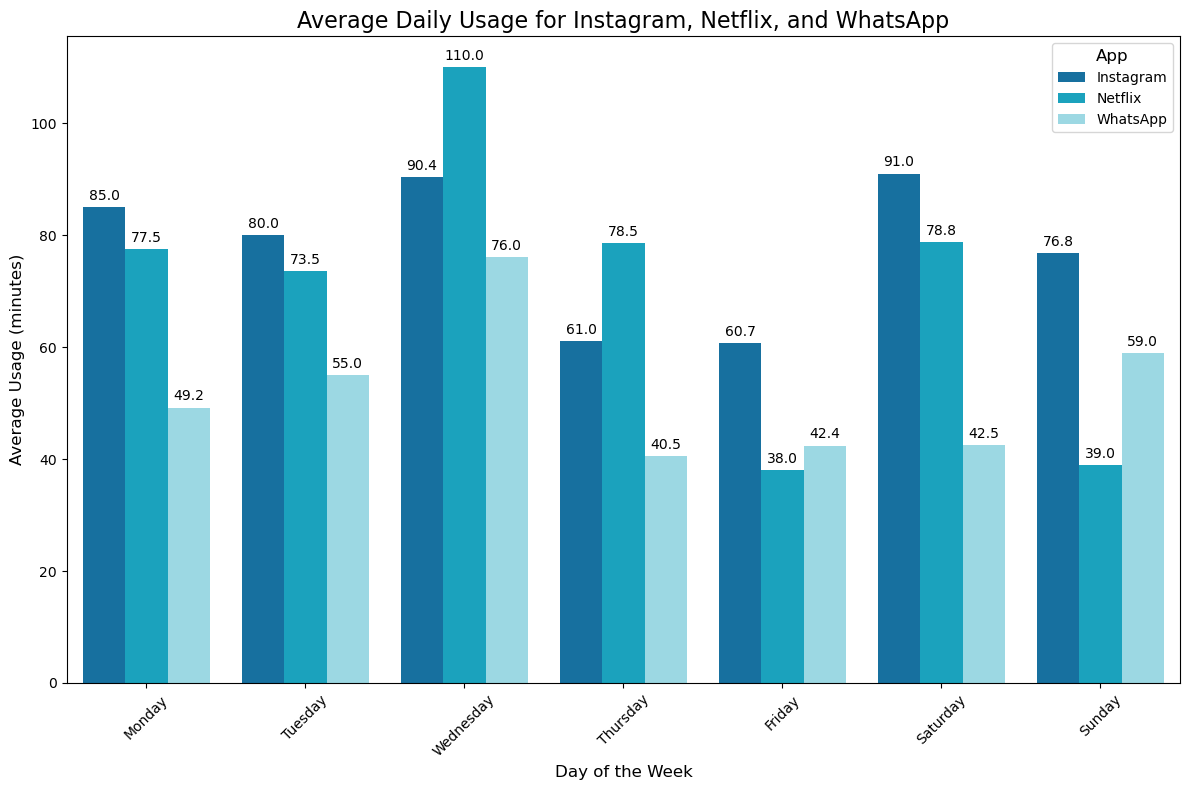

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is already defined and contains relevant data
top_apps_data = data[data['App'].isin(['Instagram', 'Netflix', 'WhatsApp'])]

# Calculate average daily usage
daily_app_usage = top_apps_data.groupby(['App', 'Day of Week'])['Usage (minutes)'].mean().reindex(
    pd.MultiIndex.from_product([['Instagram', 'Netflix', 'WhatsApp'], 
                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
                               names=['App', 'Day of Week'])).reset_index()

plt.figure(figsize=(12, 8))

# Define custom colors
colors = ["#0077b6", "#00b4d8", "#90e0ef"]

# Create bar plot with custom colors
ax = sns.barplot(x='Day of Week', y='Usage (minutes)', hue='App', data=daily_app_usage, palette=colors)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 8), textcoords='offset points')

plt.title('Average Daily Usage for Instagram, Netflix, and WhatsApp', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='App', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

Instagram consistently records the highest usage, particularly on Saturday (91.0 minutes) and Wednesday (90.4 minutes). Netflix usage peaks on Wednesday (110.0 minutes) and Saturday (78.8 minutes), highlighting strong engagement mid-week and over the weekend. WhatsApp sees lower overall usage than Instagram and Netflix, with its highest usage on Sunday (59.0 minutes) and Wednesday (76.0 minutes). In summary, Wednesday and Saturday show the highest screen time across these three apps.

**Determining the Probability of App Openings Triggered by Notifications**

Now, I’ll calculate the probability of a user opening an app upon receiving a notification. To determine this probability for each app, we’ll follow these steps:
	1.	Identify Days with Notifications: Count the instances where notifications were received (Notifications > 0).
	2.	Count App Openings on Notification Days: Count the number of days the app was opened on days with notifications (Times Opened > 0).

Using these counts, we can calculate the probability as follows:

P(\text{Open | Notification}) = \frac{\text{Number of days the app was opened when notifications were received}}{\text{Total number of days notifications were received}}

This calculation will be applied to each app in the dataset to understand notification-driven engagement.

In [58]:
notifications_data = data[data['Notifications'] > 0]

app_opened_when_notif = notifications_data.groupby('App').apply(
    lambda x: (x['Times Opened'] > 0).sum() / len(x)
).reset_index(name='Probability of Open with Notification')

app_opened_when_notif

,App,Probability of Open with Notification
0,8 Ball Pool,1.0
1,Facebook,1.0
2,Instagram,1.0
3,LinkedIn,1.0
4,Netflix,1.0
5,Safari,1.0
6,WhatsApp,1.0
7,X,1.0


**Conclusion**

For all the listed apps—8 Ball Pool, Facebook, Instagram, LinkedIn, Netflix, Safari, WhatsApp, and X (formerly Twitter)—the probability of the user opening the app upon receiving a notification is 1.0. This indicates that each notification reliably prompts the user to open the app, highlighting notifications as a powerful driver of engagement. To effectively reduce screen time, disabling notifications would be a crucial first step, as it would decrease the prompt-driven impulse to engage with these apps.